In [24]:
import pandas as pd
from pathlib import Path
import csv
import requests
import json
import matplotlib.pyplot as plt

In [25]:
from pathlib import Path

mb_data = Path("../jeff_analysis/final_1688.csv")
budget_analysis_df = pd.read_csv(mb_data)
budget_analysis_df.info()
budget_analysis_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1688 non-null   object 
 1   revenue            1688 non-null   int64  
 2   budget             1688 non-null   int64  
 3   profit             1688 non-null   int64  
 4   main_genre         1688 non-null   object 
 5   Runtime(Mins)      1688 non-null   int64  
 6   Year               1688 non-null   int64  
 7   original_language  1688 non-null   object 
 8   Director_O         1685 non-null   object 
 9   Actors_O           1688 non-null   object 
 10  Rating             1688 non-null   float64
 11  Metascore_O        1688 non-null   int64  
 12  Rotten_Tomato_O    1688 non-null   float64
 13  Award Wins         1688 non-null   int64  
 14  Award Nominations  1688 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 197.9+ KB


Index(['title', 'revenue', 'budget', 'profit', 'main_genre', 'Runtime(Mins)',
       'Year', 'original_language', 'Director_O', 'Actors_O', 'Rating',
       'Metascore_O', 'Rotten_Tomato_O', 'Award Wins', 'Award Nominations'],
      dtype='object')

In [26]:
budget_analysis_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,0.87,159,220
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,0.73,0,0
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,0.94,163,164
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,0.82,91,131
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,0.91,39,81


In [27]:
budget_analysis_df["main_genre"].value_counts()

main_genre
Action       645
Comedy       283
Drama        237
Animation    166
Crime        102
Adventure     94
Biography     87
Horror        57
Mystery       11
Fantasy        6
Name: count, dtype: int64

In [28]:
import pandas as pd

# Assuming df is your DataFrame with a 'budget' column
# bins and groups as defined in your example
bins = [0, 15100000, 32100000, 57100000, 100100000, 380000000]
groups = ["bin 1", "bin 2", "bin 3", "bin 4", "bin 5"]

# Add a new column 'bin_labels' to the DataFrame
budget_analysis_df['bin_labels'] = pd.cut(budget_analysis_df['budget'], bins=bins, labels=groups, right=False)

# Now you can groupby 'bin_labels' and analyze the data
budget_analysis_df.tail()


,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,bin_labels
1683,Silence,578000,100000,478000,Drama,161,2016,en,Martin Scorsese,"Andrew Garfield, Adam Driver, Liam Neeson",7.1,79,0.83,0,0,bin 1
1684,Joker,1074251311,55000000,1019251311,Crime,122,2019,en,Todd Phillips,"Joaquin Phoenix, Robert De Niro, Zazie Beetz",8.4,59,0.69,0,0,bin 3
1685,Bee Movie,2930000000,150000000,2780000000,Animation,91,2007,en,"Simon J. Smith, Steve Hickner","Jerry Seinfeld, Renée Zellweger, Matthew Brode...",6.1,54,0.50,0,0,bin 5
1686,10 Things I Hate About You,1000000,13000000,-12000000,Comedy,97,1999,en,Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levitt",7.3,70,0.71,0,0,bin 1
1687,Shrek,487900000,60000000,427900000,Animation,90,2001,en,"Andrew Adamson, Vicky Jenson","Mike Myers, Eddie Murphy, Cameron Diaz",7.9,84,0.88,0,0,bin 4


In [29]:
budget_analysis_df.rename(columns={"bin_labels": "budget_bins"}, inplace=True)
budget_analysis_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,0.87,159,220,bin 5
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,0.73,0,0,bin 5
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,0.94,163,164,bin 5
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,0.82,91,131,bin 5
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,0.91,39,81,bin 5


In [30]:
from scipy import stats

budget_bin_count = budget_analysis_df.groupby("budget_bins").size()
chi_bins_df = pd.DataFrame(budget_bin_count)
chi_bins_df[1] = 337.6
chi_bins_df.columns = ["actual", "even_dist"]
chi_bins_df.head()

critical_value = stats.chi2.ppf(q = 0.95, df = 4)
print(critical_value)
stats.chisquare(chi_bins_df['actual'], chi_bins_df['even_dist'])



9.487729036781154


C:\Users\stoyt\AppData\Local\Temp\ipykernel_7288\2930276868.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_df.groupby("budget_bins").size()


Power_divergenceResult(statistic=3.937203791469194, pvalue=0.41457109635994727)

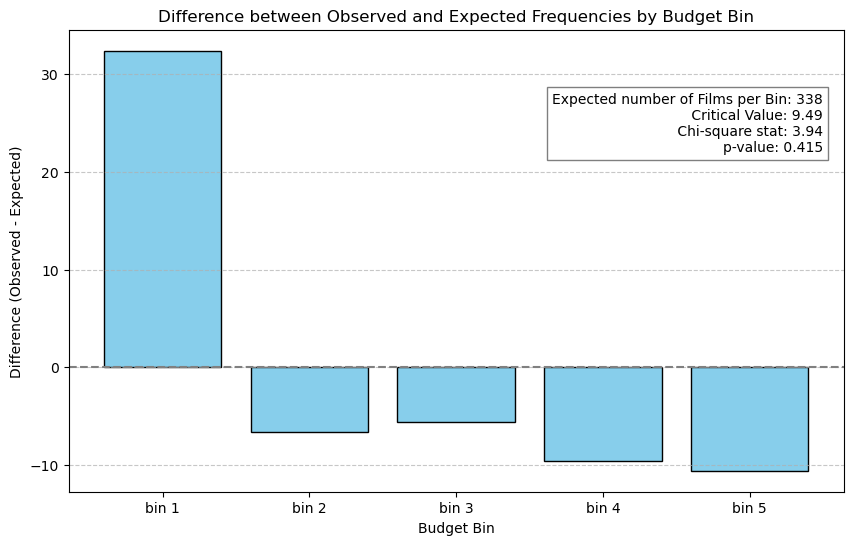

In [31]:
# Assuming chi_bins_df contains the observed and expected frequencies
# Calculate the difference between observed and expected frequencies
chi_bins_df['difference'] = chi_bins_df['actual'] - chi_bins_df['even_dist']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(chi_bins_df.index, chi_bins_df['difference'], color='skyblue', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--')  # Add horizontal line at y=0 for reference
plt.title('Difference between Observed and Expected Frequencies by Budget Bin')
plt.xlabel('Budget Bin')
plt.ylabel('Difference (Observed - Expected)')
plt.xticks(chi_bins_df.index)  # Set x-ticks as budget bin indices
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate with chi-square statistic and p-value in the top-right corner
chi2_stat, p_val = stats.chisquare(chi_bins_df['actual'], chi_bins_df['even_dist'])
plt.annotate(f'Expected number of Films per Bin: 338\n Critical Value: {critical_value:.2f}\n Chi-square stat: {chi2_stat:.2f}\np-value: {p_val:.3f}',
             xy=(1, 1), xycoords='axes fraction',
             fontsize=10, ha='right', va='top', xytext=(-15, -45), textcoords='offset points',
             bbox=dict(facecolor='white', alpha=0.5))

plt.show()


In [32]:
rating = budget_analysis_df["Rotten_Tomato_O"] < 1.01
budget_analysis_df.loc[rating, 'Rotten_Tomato_O'] = (budget_analysis_df.loc[rating, 'Rotten_Tomato_O'] * 100).astype(int)
budget_analysis_df['Rotten_Tomato_O'] = budget_analysis_df['Rotten_Tomato_O'].astype(int)
budget_analysis_df.head()


,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5


In [33]:
import pandas as pd

bins = [0, 60, 70, 80, 90, 101]
groups = ["F", "D", "C", "B", "A"]

budget_analysis_df['RT_bin'] = pd.cut(budget_analysis_df['Rotten_Tomato_O'], bins=bins, labels=groups, right=False)
budget_analysis_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins,RT_bin
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5,B
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5,C
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5,A
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5,B
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5,A


In [34]:
import pandas as pd

bins = [0, 60, 70, 80, 90, 101]
groups = ["F", "D", "C", "B", "A"]

budget_analysis_df['Meta_bin'] = pd.cut(budget_analysis_df['Metascore_O'], bins=bins, labels=groups, right=False)
budget_analysis_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins,RT_bin,Meta_bin
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5,B,C
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5,C,C
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5,A,B
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5,B,B
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5,A,D


In [35]:
mean_by_bin = budget_analysis_df.groupby("budget_bins")["Rotten_Tomato_O"].mean()

mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore_O"].mean()
print(mean_by_bin, mean_by_meta)

budget_bins
bin 1    75.621622
bin 2    66.888218
bin 3    58.981928
bin 4    58.942073
bin 5    62.963303
Name: Rotten_Tomato_O, dtype: float64 budget_bins
bin 1    68.313514
bin 2    61.154079
bin 3    56.710843
bin 4    56.722561
bin 5    59.363914
Name: Metascore_O, dtype: float64


C:\Users\stoyt\AppData\Local\Temp\ipykernel_7288\676546110.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_bin = budget_analysis_df.groupby("budget_bins")["Rotten_Tomato_O"].mean()
C:\Users\stoyt\AppData\Local\Temp\ipykernel_7288\676546110.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore_O"].mean()


In [36]:
count_f_by_bin = budget_analysis_df[budget_analysis_df["RT_bin"] == "F"].groupby("budget_bins").size()
print(count_f_by_bin)

budget_bins
bin 1     78
bin 2    109
bin 3    152
bin 4    155
bin 5    138
dtype: int64


C:\Users\stoyt\AppData\Local\Temp\ipykernel_7288\1271720525.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_f_by_bin = budget_analysis_df[budget_analysis_df["RT_bin"] == "F"].groupby("budget_bins").size()


In [37]:
count_a_by_bin = budget_analysis_df[budget_analysis_df["RT_bin"] == "A"].groupby("budget_bins").size()
# Display the count
print(count_a_by_bin)

budget_bins
bin 1    130
bin 2     61
bin 3     39
bin 4     33
bin 5     60
dtype: int64


C:\Users\stoyt\AppData\Local\Temp\ipykernel_7288\3613641825.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_a_by_bin = budget_analysis_df[budget_analysis_df["RT_bin"] == "A"].groupby("budget_bins").size()


In [38]:
budget_analysis_df = budget_analysis_df.assign(weighted_profit=lambda x: (x['profit'] / x['budget']).round(2))
budget_analysis_df.head()

,title,revenue,budget,profit,main_genre,Runtime(Mins),Year,original_language,Director_O,Actors_O,Rating,Metascore_O,Rotten_Tomato_O,Award Wins,Award Nominations,budget_bins,RT_bin,Meta_bin,weighted_profit
0,Inception,825532764,160000000,665532764,Action,148,2010,en,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,74,87,159,220,bin 5,B,C,4.16
1,Interstellar,701729206,165000000,536729206,Adventure,169,2014,en,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.6,74,73,0,0,bin 5,C,C,3.25
2,The Dark Knight,1004558444,185000000,819558444,Action,152,2008,en,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",9.0,84,94,163,164,bin 5,A,B,4.43
3,Avatar,2923706026,237000000,2686706026,Action,162,2009,en,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",7.8,83,82,91,131,bin 5,B,B,11.34
4,The Avengers,1518815515,220000000,1298815515,Action,143,2012,en,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.0,69,91,39,81,bin 5,A,D,5.90


In [39]:
com_stats = budget_analysis_df.groupby("main_genre")[["Rotten_Tomato_O", "Metascore_O", "weighted_profit"]].agg(['mean', 'count'])

com_stats.columns = ['_'.join(col).strip() for col in com_stats.columns.values]

com_stats = com_stats.rename(columns={
    'Rotten_Tomato_O_mean': 'Mean_Rotten_Tomatoes_Rating',
    'Rotten_Tomato_O_count': 'Count',
    'Metascore_O_mean': 'Mean_Metascore',
    'Metascore_O_count': 'Count',  # This will be the same as the Rotten_Tomato_O count
    'weighted_profit_mean': 'Weighted_Profit'
})

com_stats = com_stats.loc[:, ~com_stats.columns.duplicated()]

print(com_stats)



            Mean_Rotten_Tomatoes_Rating  Count  Mean_Metascore  \
main_genre                                                       
Action                        59.282171    645       56.010853   
Adventure                     64.000000     94       59.574468   
Animation                     75.343373    166       67.590361   
Biography                     77.586207     87       70.517241   
Comedy                        61.731449    283       58.134276   
Crime                         73.460784    102       66.990196   
Drama                         70.540084    237       66.890295   
Fantasy                       46.166667      6       48.500000   
Horror                        60.631579     57       55.122807   
Mystery                       63.636364     11       64.545455   

            Weighted_Profit  weighted_profit_count  
main_genre                                          
Action             3.612233                    645  
Adventure          3.505426                     

In [40]:
#The absurdly high weighted_profit of Horror movies in bin 1 strongly suggests a sampling bias that, while almost undoubtedly rooted in truth to a
#good degree, nonetheless could be skewing the data.

com_mean = budget_analysis_df.groupby(["main_genre", "budget_bins"])["weighted_profit"].agg(['mean', 'count'])
com_mean_df = com_mean.reset_index()
com_mean_horror = com_mean_df.loc[com_mean_df["main_genre"] == "Horror", :]

print(com_mean_horror)


   main_genre budget_bins        mean  count
40     Horror       bin 1  171.014118     34
41     Horror       bin 2    5.521429     14
42     Horror       bin 3    2.895000      8
43     Horror       bin 4   -0.380000      1
44     Horror       bin 5         NaN      0


C:\Users\stoyt\AppData\Local\Temp\ipykernel_7288\804866186.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  com_mean = budget_analysis_df.groupby(["main_genre", "budget_bins"])["weighted_profit"].agg(['mean', 'count'])


In [41]:
import pandas as pd
from scipy.stats import f_oneway

bin_1_data = budget_analysis_df[budget_analysis_df["budget_bins"] == "bin 1"]

bin_1_means = bin_1_data.groupby("main_genre")["weighted_profit"].mean()
print(bin_1_means)

groups = [bin_1_data[bin_1_data["main_genre"] == genre]["weighted_profit"] for genre in bin_1_data["main_genre"].unique()]

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)

print("\nANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


main_genre
Action        14.570492
Adventure      4.286364
Animation     33.961875
Biography      8.003158
Comedy        10.452892
Crime         14.316154
Drama          9.705196
Fantasy        6.060000
Horror       171.014118
Mystery       10.210000
Name: weighted_profit, dtype: float64

ANOVA results:
F-statistic: 1.8223429621151295
p-value: 0.06295085540361121


C:\Users\stoyt\AppData\Local\Temp\ipykernel_7288\991064451.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore_O"].mean()



ANOVA results:
F-statistic: 29.73821961517758
p-value: 6.224744299142306e-24


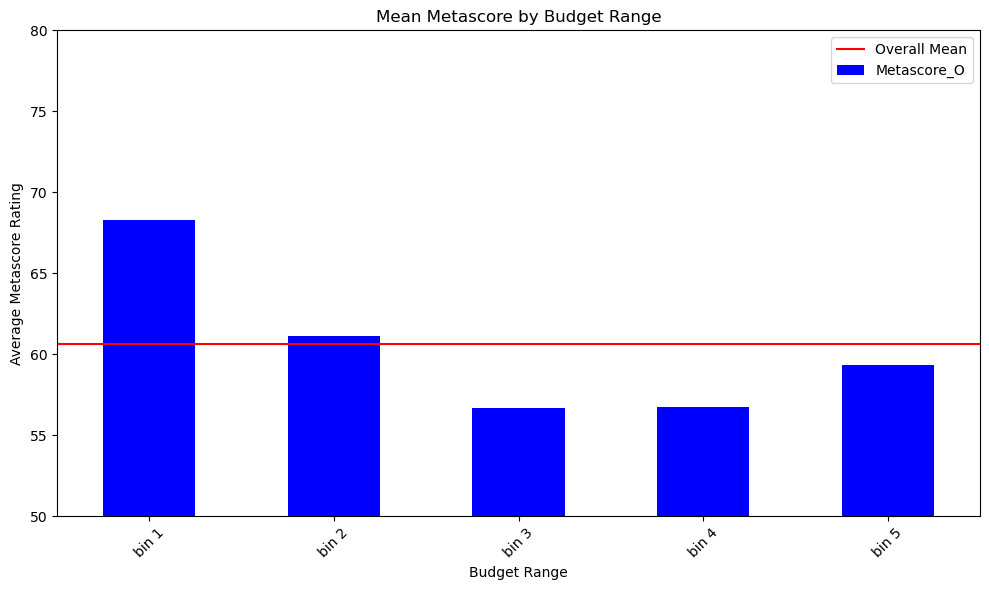

In [42]:
import matplotlib.pyplot as plt

# Calculate the mean Metascore for each budget bin
mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore_O"].mean()

overall_meta_mean = round(budget_analysis_df["Metascore_O"].mean(), 2)

groups = [budget_analysis_df[budget_analysis_df["budget_bins"] == bin_value]["Metascore_O"] for bin_value in budget_analysis_df["budget_bins"].unique()]

f_statistic, p_value = f_oneway(*groups)

print("\nANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

plt.figure(figsize=(10, 6))
mean_by_meta.plot(kind='bar', color='blue')
plt.axhline(y=overall_meta_mean, color='red', linestyle='-', label='Overall Mean')
plt.xlabel("Budget Range")
plt.ylabel("Average Metascore Rating")
plt.ylim(50, 80)
plt.title("Mean Metascore by Budget Range")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\stoyt\AppData\Local\Temp\ipykernel_7288\1794811355.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten_Tomato_O"].mean()



ANOVA results:
F-statistic: 29.972895664031878
p-value: 4.04502686751637e-24


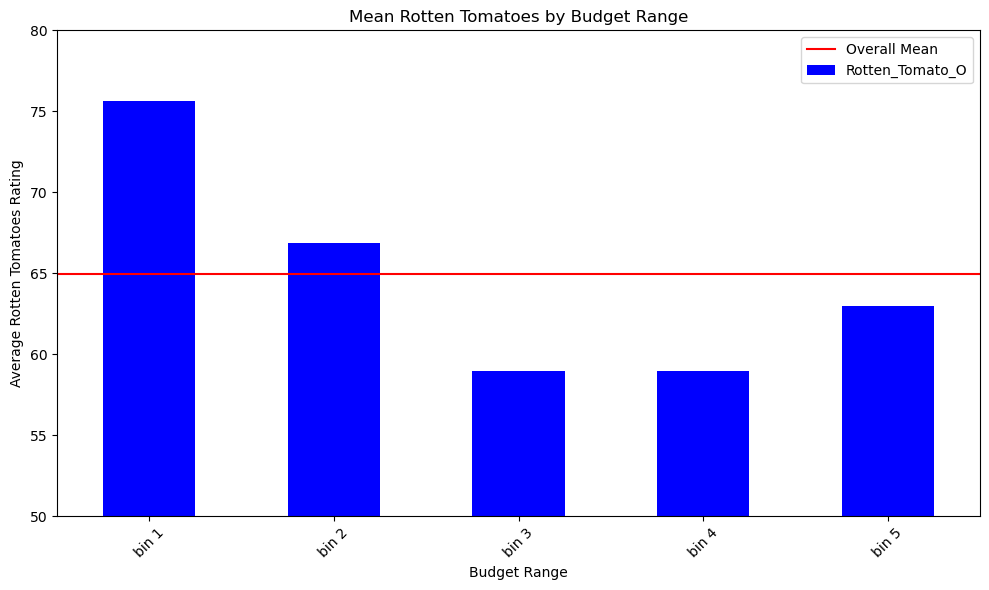

In [43]:
import matplotlib.pyplot as plt

# Calculate the mean Metascore for each budget bin
mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten_Tomato_O"].mean()

overall_RT_mean = round(budget_analysis_df["Rotten_Tomato_O"].mean(), 2)

groups = [budget_analysis_df[budget_analysis_df["budget_bins"] == bin_value]["Rotten_Tomato_O"] for bin_value in budget_analysis_df["budget_bins"].unique()]

f_statistic, p_value = f_oneway(*groups)

print("\nANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_by_RT.plot(kind='bar', color='blue')
plt.axhline(y=overall_RT_mean, color='red', linestyle='-', label='Overall Mean')
plt.xlabel("Budget Range")
plt.ylabel("Average Rotten Tomatoes Rating")
plt.ylim(50, 80)
plt.title("Mean Rotten Tomatoes by Budget Range")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\stoyt\AppData\Local\Temp\ipykernel_7288\3528853703.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore_O"].mean()
C:\Users\stoyt\AppData\Local\Temp\ipykernel_7288\3528853703.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten_Tomato_O"].mean()


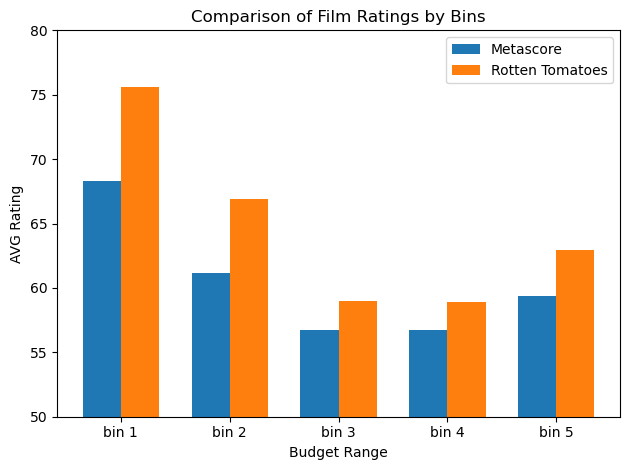

In [44]:
import matplotlib.pyplot as plt
import numpy as np

bins = sorted(budget_analysis_df["budget_bins"].unique())
mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore_O"].mean()
mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten_Tomato_O"].mean()

bar_width = 0.35

# Set the positions for the bars
x = np.arange(len(bins))

# Plot the bars for the first rating
plt.bar(x - bar_width/2, mean_by_meta, bar_width, label='Metascore')

# Plot the bars for the second rating
plt.bar(x + bar_width/2, mean_by_RT, bar_width, label='Rotten Tomatoes')

# Add labels, title, legend, etc.
plt.xlabel('Budget Range')
plt.ylabel('AVG Rating')
plt.ylim(50, 80)
plt.title('Comparison of Film Ratings by Bins')
plt.xticks(x, bins)  # Assuming bins are the labels for x-axis
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\stoyt\AppData\Local\Temp\ipykernel_7288\830487178.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_df.groupby("budget_bins").size()


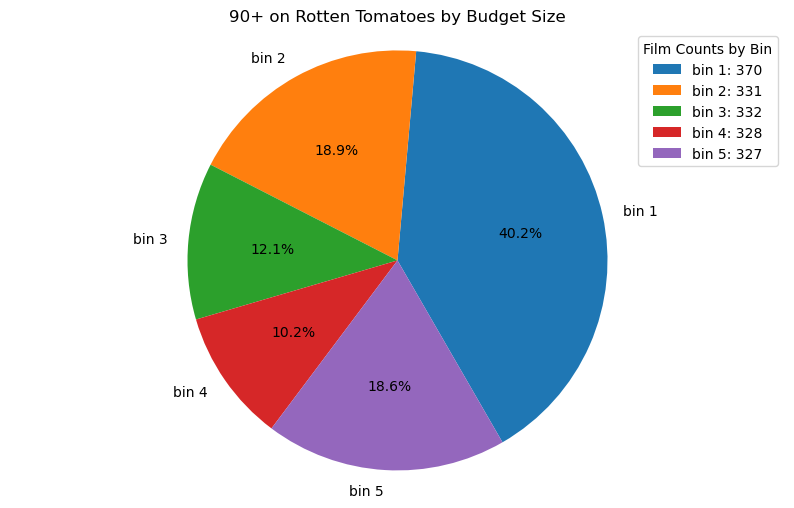

In [46]:
import matplotlib.pyplot as plt

budget_bin_count = budget_analysis_df.groupby("budget_bins").size()

# Assuming count_a_by_bin is your Series containing the counts
labels = count_a_by_bin.index  # Budget bins as labels
sizes = count_a_by_bin.values  # Counts as sizes

# Plotting the pie chart with adjusted subplot size
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=300)
ax.set_title('90+ on Rotten Tomatoes by Budget Size')
ax.axis('equal')

# Adding legend showing total film counts by budget bin
legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, budget_bin_count)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

plt.show()

C:\Users\stoyt\AppData\Local\Temp\ipykernel_20300\1989291213.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_df.groupby("budget_bins").size()


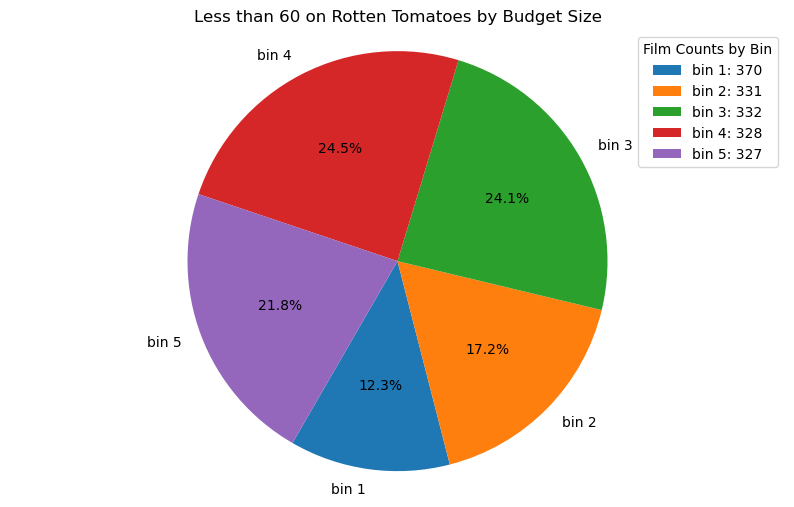

In [145]:
import matplotlib.pyplot as plt

budget_bin_count = budget_analysis_df.groupby("budget_bins").size()

# Assuming count_a_by_bin is your Series containing the counts
labels = count_f_by_bin.index  # Budget bins as labels
sizes = count_f_by_bin.values  # Counts as sizes

# Plotting the pie chart with adjusted subplot size
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=240)
ax.set_title('Less than 60 on Rotten Tomatoes by Budget Size')
ax.axis('equal')

# Adding legend showing total film counts by budget bin
legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, budget_bin_count)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

plt.show()

In [146]:
prof_mean_bybin = budget_analysis_df.groupby("budget_bins")["weighted_profit"].mean()
prof_mean_bybin

C:\Users\stoyt\AppData\Local\Temp\ipykernel_20300\3841688139.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prof_mean_bybin = budget_analysis_df.groupby("budget_bins")["weighted_profit"].mean()


budget_bins
bin 1    26.780081
bin 2     4.271662
bin 3     3.025723
bin 4     2.501616
bin 5     2.396422
Name: weighted_profit, dtype: float64

C:\Users\stoyt\AppData\Local\Temp\ipykernel_20300\48259568.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_data in budget_analysis_df.groupby("budget_bins")["weighted_profit"]:


F-statistic: 3.7937682806610082
p-value: 0.00446650728418559


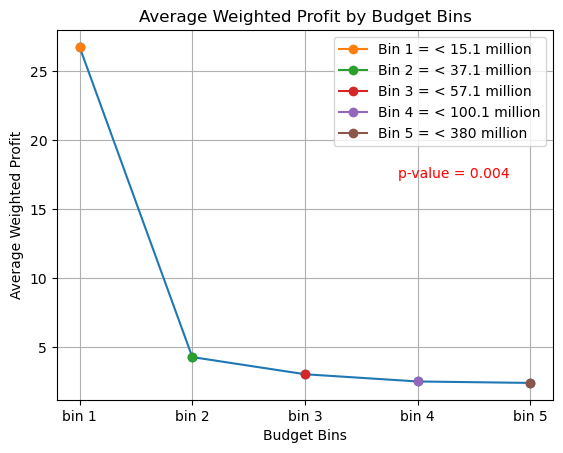

In [147]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

prof_mean_bybin = budget_analysis_df.groupby("budget_bins")["weighted_profit"].mean()
budget_bins_labels = ["< 15.1 million", "< 37.1 million", "< 57.1 million", "< 100.1 million", "< 380 million"]

groups = []
for group_name, group_data in budget_analysis_df.groupby("budget_bins")["weighted_profit"]:
    groups.append(group_data)

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Plotting
plt.plot(prof_mean_bybin.index, prof_mean_bybin.values, marker='o', linestyle='-')
plt.title('Average Weighted Profit by Budget Bins')
plt.xlabel('Budget Bins')
plt.ylabel('Average Weighted Profit')

for i, bin_label in enumerate(budget_bins_labels):
    plt.plot(prof_mean_bybin.index[i], prof_mean_bybin.values[i], marker='o', linestyle='-', label=f'Bin {i+1} = {bin_label}')

plt.annotate(f'p-value = {p_value:.3f}', xy=(0.8, 0.6), xycoords='axes fraction', ha='center', color= "red")


plt.legend()
plt.grid(True)
plt.show()


In [148]:
groups = []
total_profit_mean_bybin = budget_analysis_df.groupby("budget_bins")["profit"].mean().astype(int)
total_profit_mean_bybin

C:\Users\stoyt\AppData\Local\Temp\ipykernel_20300\3305109238.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_profit_mean_bybin = budget_analysis_df.groupby("budget_bins")["profit"].mean().astype(int)


budget_bins
bin 1     65199596
bin 2     99595694
bin 3    131660086
bin 4    191816016
bin 5    385242790
Name: profit, dtype: int32

C:\Users\stoyt\AppData\Local\Temp\ipykernel_20300\2831344255.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_profit_mean_bybin = budget_analysis_df.groupby("budget_bins")["profit"].mean().astype(int)
C:\Users\stoyt\AppData\Local\Temp\ipykernel_20300\2831344255.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_data in budget_analysis_df.groupby("budget_bins")["profit"]:


F-statistic: 121.70285978236498
p-value: 2.6851121768272256e-91


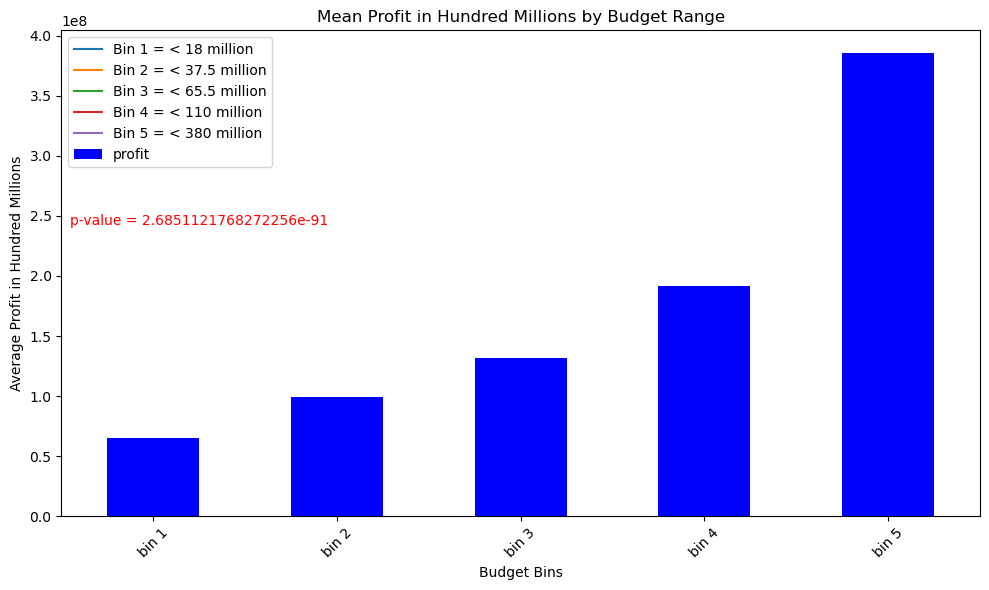

In [149]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Sample data
total_profit_mean_bybin = budget_analysis_df.groupby("budget_bins")["profit"].mean().astype(int)
budget_bin_labels = ["< 18 million", "< 37.5 million", "< 65.5 million", "< 110 million", "< 380 million"]

groups = []
for group_name, group_data in budget_analysis_df.groupby("budget_bins")["profit"]:
    groups.append(group_data)

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Plotting
plt.figure(figsize=(10, 6))
bars = total_profit_mean_bybin.plot(kind='bar', color='blue')
plt.xlabel("Budget Bins")
plt.ylabel("Average Profit in Hundred Millions")
plt.title("Mean Profit in Hundred Millions by Budget Range")
plt.xticks(rotation=45)

for i, bin_label in enumerate(budget_bin_labels):
    plt.plot(prof_mean_bybin.index[i], prof_mean_bybin.values[i], label=f'Bin {i+1} = {bin_label}')

plt.annotate(f'p-value = {p_value}', xy=(0.15, 0.6), xycoords='axes fraction', ha='center', color= "red")

plt.legend()


plt.tight_layout()
plt.show()


In [150]:
mean_budget_bygenre = budget_analysis_df.groupby("main_genre")["budget"].agg(["mean", "count"]).astype(int)
mean_budget_bygenre

,mean,count
main_genre,,
Action,86984991,645
Adventure,61990425,94
Animation,99563615,166
Biography,36578160,87
Comedy,32696257,283
Crime,31761519,102
Drama,28103261,237
Fantasy,44833333,6
Horror,16290034,57


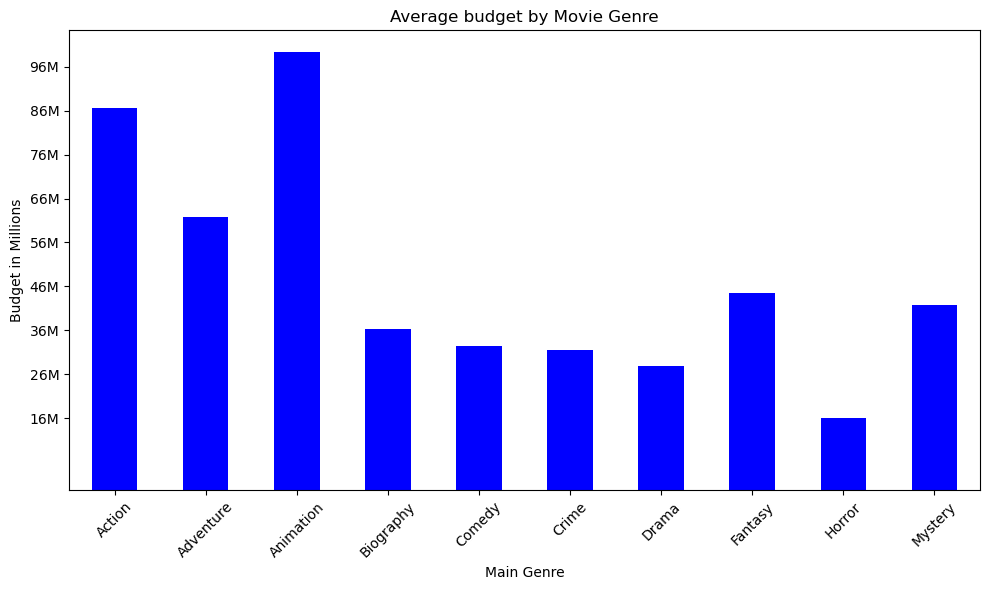

In [151]:
import matplotlib.pyplot as plt

# Calculate the mean Metascore for each budget bin
mean_budget_bygenre = budget_analysis_df.groupby("main_genre")["budget"].mean().astype(int)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_budget_bygenre.plot(kind='bar', color='blue')
plt.xlabel("Main Genre")
plt.ylabel("Budget in Millions")
#plt.ylim(50, 70)
plt.title("Average budget by Movie Genre")

min_budget = mean_budget_bygenre.min()
max_budget = mean_budget_bygenre.max()
plt.yticks(range(min_budget, max_budget+1, 10**7), [f'{x//10**6}M' for x in range(min_budget, max_budget+1, 10**7)])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [152]:
prof_by_genre = budget_analysis_df.groupby("main_genre")["weighted_profit"].agg(["mean", "count"])
prof_by_genre

,mean,count
main_genre,,
Action,3.612233,645
Adventure,3.505426,94
Animation,6.577470,166
Biography,3.800690,87
Comedy,5.778269,283
Crime,7.397157,102
Drama,6.216751,237
Fantasy,2.426667,6
Horror,103.764211,57


In [153]:
def genre_stats(genre):
    genre_profit = budget_analysis_df.loc[budget_analysis_df["main_genre"] == genre, :]
    genre_count = genre_profit["main_genre"].count()
    genre_profit_budget = round(genre_profit["budget"].mean(),2)
    genre_profit_revenue = round(genre_profit["revenue"].mean(), 2)
    genre_profit_weighted = round(genre_profit_revenue/genre_profit_budget, 2)
    
    return f"AVG Budget: {genre_profit_budget}\n AVG Revenue: {genre_profit_revenue}\n Weighted Profit: {genre_profit_weighted}\n Count: {genre_count}"

print(genre_stats("Comedy"))


AVG Budget: 32696257.24
 AVG Revenue: 149683099.33
 Weighted Profit: 4.58
 Count: 283


c:\Users\stoyt\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


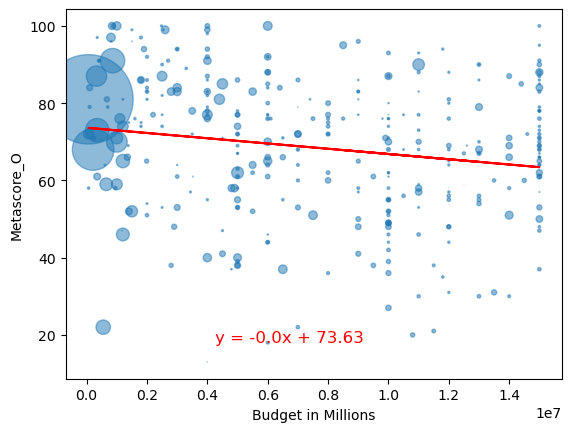

In [159]:
from scipy.stats import linregress
bin_1_data = budget_analysis_df[budget_analysis_df["budget_bins"] == "bin 1"]
x_values = bin_1_data["budget"]
y_values = bin_1_data["Metascore_O"]
profit_bin_1 = bin_1_data["weighted_profit"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values, s=profit_bin_1, alpha=0.5)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0.3, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.xlabel('Budget in Millions')
plt.ylabel('Metascore_O')
plt.show()

Slope: 0.0000000508


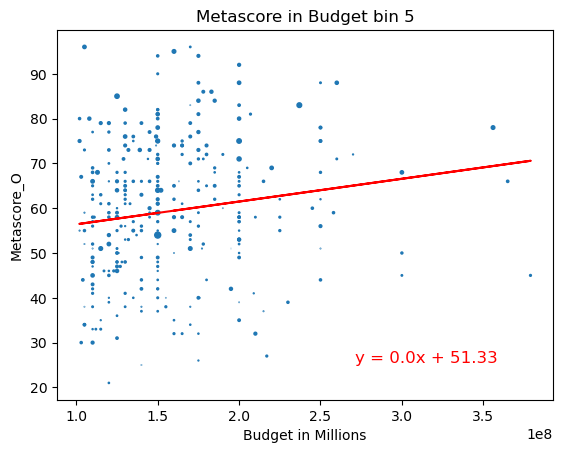

In [160]:
from scipy.stats import linregress

bin_5_data = budget_analysis_df[budget_analysis_df["budget_bins"] == "bin 5"]

budget_bin_5 = bin_5_data["budget"]
score_bin_5 = bin_5_data["Metascore_O"]
profit_bin_5 = bin_5_data["weighted_profit"]

# Add the linear regression equation and line to plot
x_values = budget_bin_5
y_values = score_bin_5
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, s=profit_bin_5, alpha=0.99999999)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0.6, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.title("Metascore in Budget bin 5")
plt.xlabel('Budget in Millions')
plt.ylabel('Metascore_O')
print(f"Slope: {slope:.10f}")

Slope: -0.0000000306


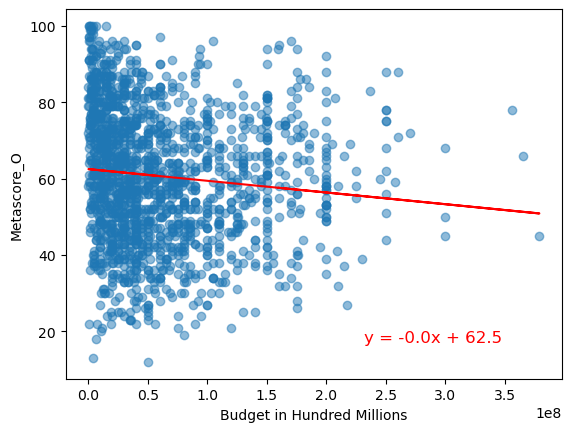

In [161]:
from scipy.stats import linregress

budget_data = budget_analysis_df["budget"]
score_data = budget_analysis_df["Metascore_O"]
profit_data = budget_analysis_df["weighted_profit"]

# Add the linear regression equation and line to plot
x_values = budget_data
y_values = score_data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0.6, 0.1), xycoords='axes fraction', fontsize=12, color="red")
plt.xlabel('Budget in Hundred Millions')
plt.ylabel('Metascore_O')
print(f"Slope: {slope:.10f}")

C:\Users\stoyt\AppData\Local\Temp\ipykernel_20300\2024849479.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = budget_analysis_df.groupby("budget_bins")["weighted_profit"].apply(list)


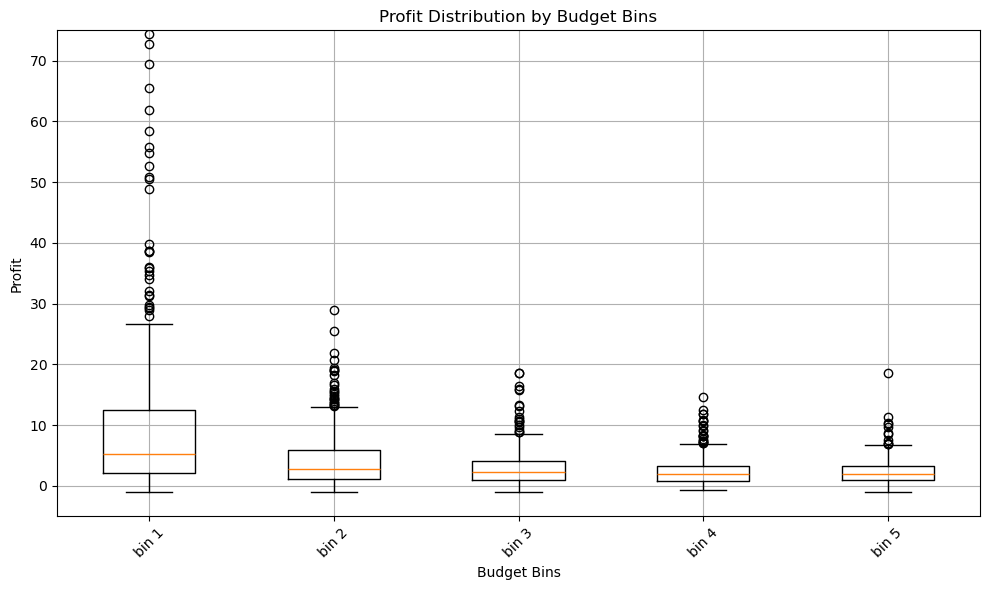

In [164]:
import matplotlib.pyplot as plt

data = budget_analysis_df.groupby("budget_bins")["weighted_profit"].apply(list)

# Plotting the box plots
plt.figure(figsize=(10, 6))

# Create box plots
plt.boxplot(data.values)

# Set labels and title
plt.xlabel("Budget Bins")
plt.ylabel("Profit")
plt.ylim(-5, 75)
plt.title("Profit Distribution by Budget Bins")
plt.xticks(range(1, len(data) + 1), data.index)  # Set x-ticks as bin labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [50]:
for i, (bin_label, bin_data) in enumerate(data.items()):
    quartiles = pd.Series(bin_data).quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f"Bin {bin_label}:")
    print(f"The lower quartile of data is: {lowerq}")
    print(f"The upper quartile of data is: {upperq}")
    print(f"The interquartile range of data is: {iqr}")
    print(f"The the median of data is: {quartiles[0.5]}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

plt.tight_layout()
plt.show()

Bin bin 1:
The lower quartile of data is: 2.27
The upper quartile of data is: 13.38
The interquartile range of data is: 11.110000000000001
The the median of data is: 6.15
Values below -14.395000000000003 could be outliers.
Values above 30.045 could be outliers.
Bin bin 2:
The lower quartile of data is: 1.04
The upper quartile of data is: 5.82
The interquartile range of data is: 4.78
The the median of data is: 2.69
Values below -6.13 could be outliers.
Values above 12.99 could be outliers.
Bin bin 3:
The lower quartile of data is: 0.845
The upper quartile of data is: 3.71
The interquartile range of data is: 2.865
The the median of data is: 2.115
Values below -3.4525000000000006 could be outliers.
Values above 8.0075 could be outliers.
Bin bin 4:
The lower quartile of data is: 0.815
The upper quartile of data is: 3.3024999999999998
The interquartile range of data is: 2.4875
The the median of data is: 1.9249999999999998
Values below -2.91625 could be outliers.
Values above 7.0337499999999

<Figure size 640x480 with 0 Axes>

In [151]:
profit_loss = budget_analysis_df.loc[budget_analysis_df["profit"] < 0, :]
movie_counts_by_bin_loss = profit_loss["budget_bins"].value_counts()
print(movie_counts_by_bin_loss)

budget_bins
bin 2    32
bin 3    25
bin 1    22
bin 4    22
bin 5    11
Name: count, dtype: int64


C:\Users\stoyt\AppData\Local\Temp\ipykernel_4836\3147095912.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_bin_count = budget_analysis_df.groupby("budget_bins").size()


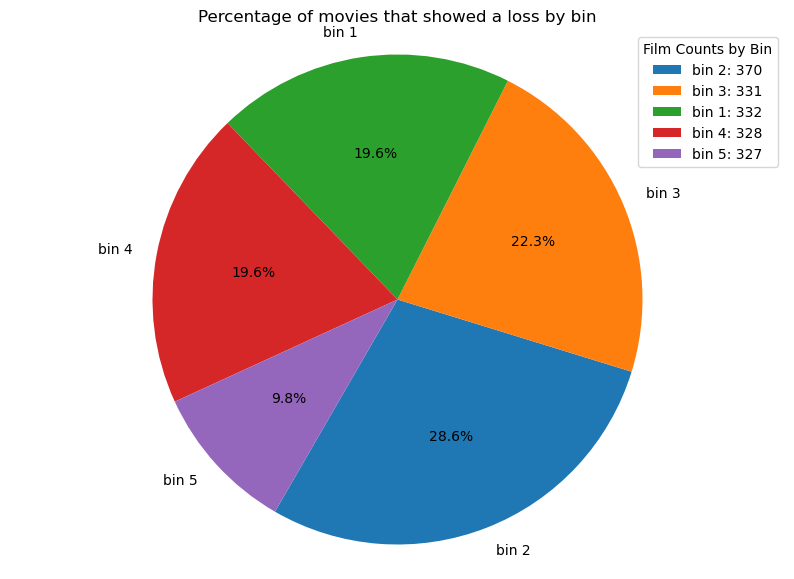

In [153]:
import matplotlib.pyplot as plt

budget_bin_count = budget_analysis_df.groupby("budget_bins").size()

# Assuming count_a_by_bin is your Series containing the counts
labels = movie_counts_by_bin_loss.index  # Budget bins as labels
sizes = movie_counts_by_bin_loss.values  # Counts as sizes

# Plotting the pie chart with adjusted subplot size
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=240)
ax.set_title('Percentage of movies that showed a loss by bin')
ax.axis('equal')

# Adding legend showing total film counts by budget bin
legend_labels = ['{}: {}'.format(label, size) for label, size in zip(labels, budget_bin_count)]
ax.legend(legend_labels, title="Film Counts by Bin", loc='upper right')

plt.show()

In [156]:
from scipy import stats

movie_loss_count = movie_counts_by_bin_loss.values
chi_bins_df = pd.DataFrame(movie_loss_count)
chi_bins_df[1] = 22.4
chi_bins_df.columns = ["actual", "even_dist"]
chi_bins_df.head()

critical_value = stats.chi2.ppf(q = 0.95, df = 4)
print(f'critical value = {critical_value}')
stats.chisquare(chi_bins_df['actual'], chi_bins_df['even_dist'])

critical value = 9.487729036781154


Power_divergenceResult(statistic=10.232142857142858, pvalue=0.03669365373581537)